In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

## 데이터 확인

In [3]:
df = pd.read_csv("./data/seoul.csv", skiprows = 6)
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1907-10-01,108,13.5,7.9,20.7
1,\t1907-10-02,108,16.2,7.9,22.0
2,\t1907-10-03,108,16.2,13.1,21.3
3,\t1907-10-04,108,16.5,11.2,22.0
4,\t1907-10-05,108,17.6,10.9,25.4


In [4]:
df.shape

(42095, 5)

In [5]:
df.dtypes

날짜          object
지점           int64
평균기온(℃)    float64
최저기온(℃)    float64
최고기온(℃)    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42095 entries, 0 to 42094
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       42095 non-null  object 
 1   지점       42095 non-null  int64  
 2   평균기온(℃)  41339 non-null  float64
 3   최저기온(℃)  41336 non-null  float64
 4   최고기온(℃)  41336 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,42095.0,41339.000000,41336.000000,41336.000000
mean,108.0,11.777776,7.490495,16.777593
std,0.0,10.661494,10.889021,10.975401
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.700000,-1.400000,7.300000
50%,108.0,13.000000,8.000000,18.600000
75%,108.0,21.200000,17.100000,26.300000
max,108.0,33.700000,30.300000,39.600000


In [8]:
# 날짜 이상데이터 제거
df["날짜"] = df["날짜"].str.strip()

In [9]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [10]:
# 결측치 확인
df.isna().sum()

날짜           0
지점           0
평균기온(℃)    756
최저기온(℃)    759
최고기온(℃)    759
dtype: int64

In [13]:
df[df["최저기온(℃)"].isna()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


- 1950년 6.25 전쟁으로 당시 데이터가 수집되지 않은 것으로 추정
    - 1950/06/25 ~ 1953/07/27

In [14]:
df.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [15]:
df.columns = ["날짜", "지점", "평균기온", "최저기온", "최고기온"]

In [16]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


## 데이터 분석

## 서울이 가장 더웠던 날

- 서울의 최고기온이 가장 높았던 날

In [17]:
df["최고기온"].max()

39.6

In [18]:
df["최고기온"].idxmax()

40051

In [19]:
df.loc[40051]

날짜      2018-08-01
지점             108
평균기온          33.6
최저기온          27.8
최고기온          39.6
Name: 40051, dtype: object

In [21]:
df.sort_values(by = "최고기온", ascending = False)

,날짜,지점,평균기온,최저기온,최고기온
40051,2018-08-01,108,33.6,27.8,39.6
31277,1994-07-24,108,33.1,28.1,38.4
40050,2018-07-31,108,32.6,27.8,38.3
31276,1994-07-23,108,32.6,28.0,38.2
13111,1943-08-24,108,29.0,23.2,38.2
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


## 내 생일의 기온 변화

In [22]:
# 생일 데이터 추출 ver1
df[df["날짜"].str.endswith("02-07")]

,날짜,지점,평균기온,최저기온,최고기온
129,1908-02-07,108,-9.6,-15.8,-3.7
495,1909-02-07,108,-7.9,-13.2,-2.7
860,1910-02-07,108,0.8,-2.3,5.0
1225,1911-02-07,108,-1.6,-8.2,3.5
1590,1912-02-07,108,0.6,-7.4,6.6
...,...,...,...,...,...
40606,2020-02-07,108,-1.7,-7.2,2.2
40972,2021-02-07,108,3.6,-2.6,7.7
41337,2022-02-07,108,-2.5,-7.3,1.9
41702,2023-02-07,108,3.5,-0.6,9.5


In [23]:
# 생일 데이터 추출 ver2
ndf = df.copy()

In [25]:
ndf["date"] = pd.to_datetime(df["날짜"])

In [26]:
ndf.head()

,날짜,지점,평균기온,최저기온,최고기온,date
0,1907-10-01,108,13.5,7.9,20.7,1907-10-01
1,1907-10-02,108,16.2,7.9,22.0,1907-10-02
2,1907-10-03,108,16.2,13.1,21.3,1907-10-03
3,1907-10-04,108,16.5,11.2,22.0,1907-10-04
4,1907-10-05,108,17.6,10.9,25.4,1907-10-05


In [35]:
bd_df = ndf[(ndf["date"].dt.month == 2) & (ndf["date"].dt.day == 7)]

In [36]:
bd_df.head()

,날짜,지점,평균기온,최저기온,최고기온,date
129,1908-02-07,108,-9.6,-15.8,-3.7,1908-02-07
495,1909-02-07,108,-7.9,-13.2,-2.7,1909-02-07
860,1910-02-07,108,0.8,-2.3,5.0,1910-02-07
1225,1911-02-07,108,-1.6,-8.2,3.5,1911-02-07
1590,1912-02-07,108,0.6,-7.4,6.6,1912-02-07


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


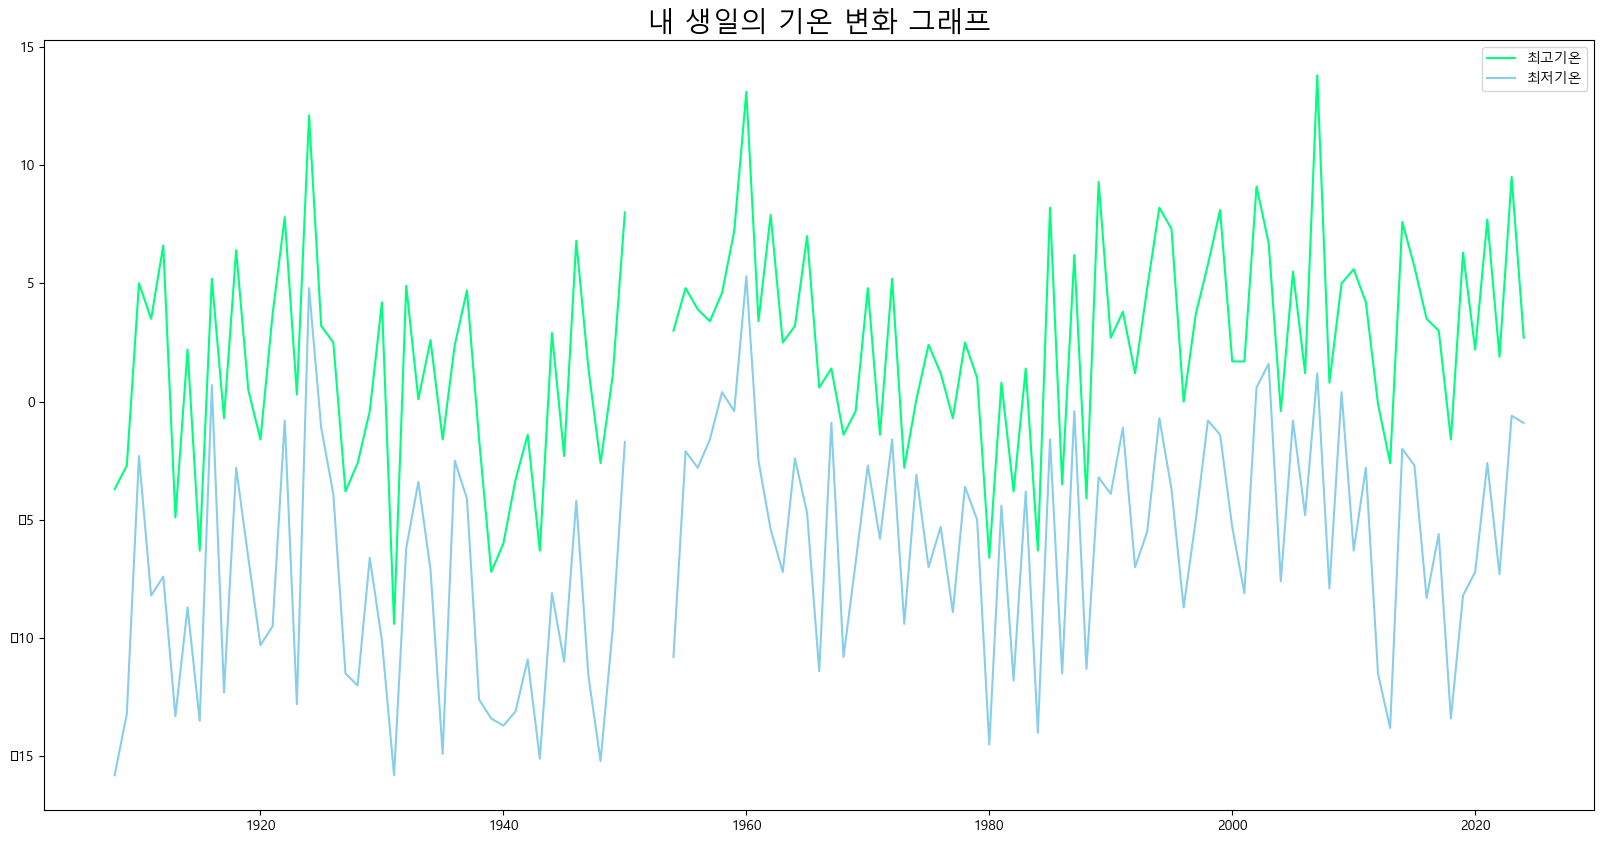

In [37]:
# 시각화
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1, 1, 1)

ax.plot(bd_df["date"].dt.year, bd_df["최고기온"], "springgreen", label = "최고기온")
ax.plot(bd_df["date"].dt.year, bd_df["최저기온"], "skyblue", label = "최저기온")
ax.legend()
ax.set_title("내 생일의 기온 변화 그래프", size = 20)

plt.show()

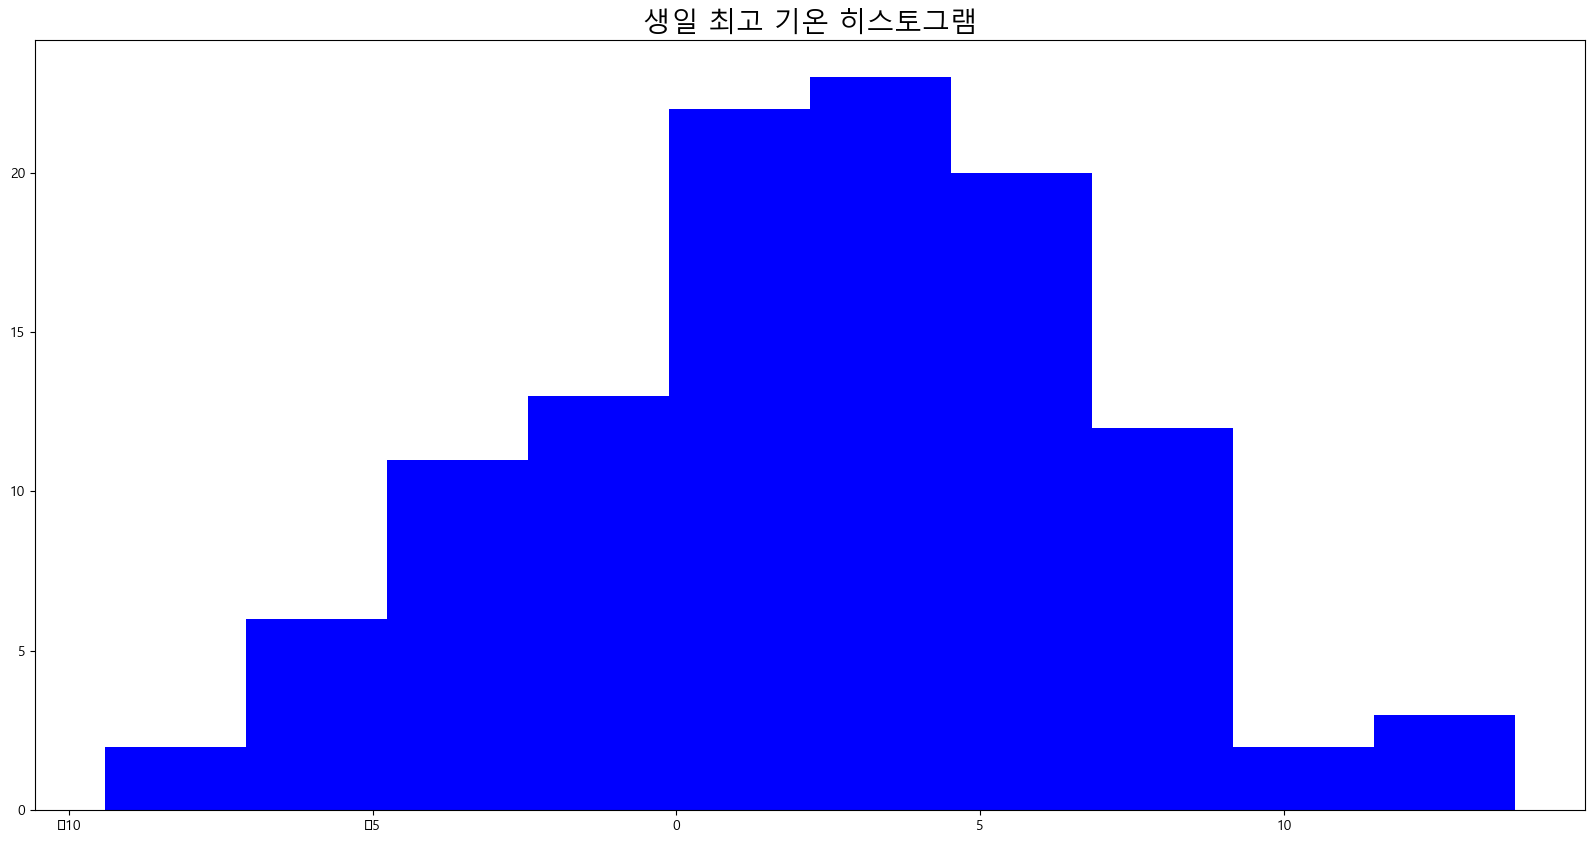

In [39]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1, 1, 1)

ax.hist(bd_df["최고기온"], color = "blue")
ax.set_title("생일 최고 기온 히스토그램", size = 20)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


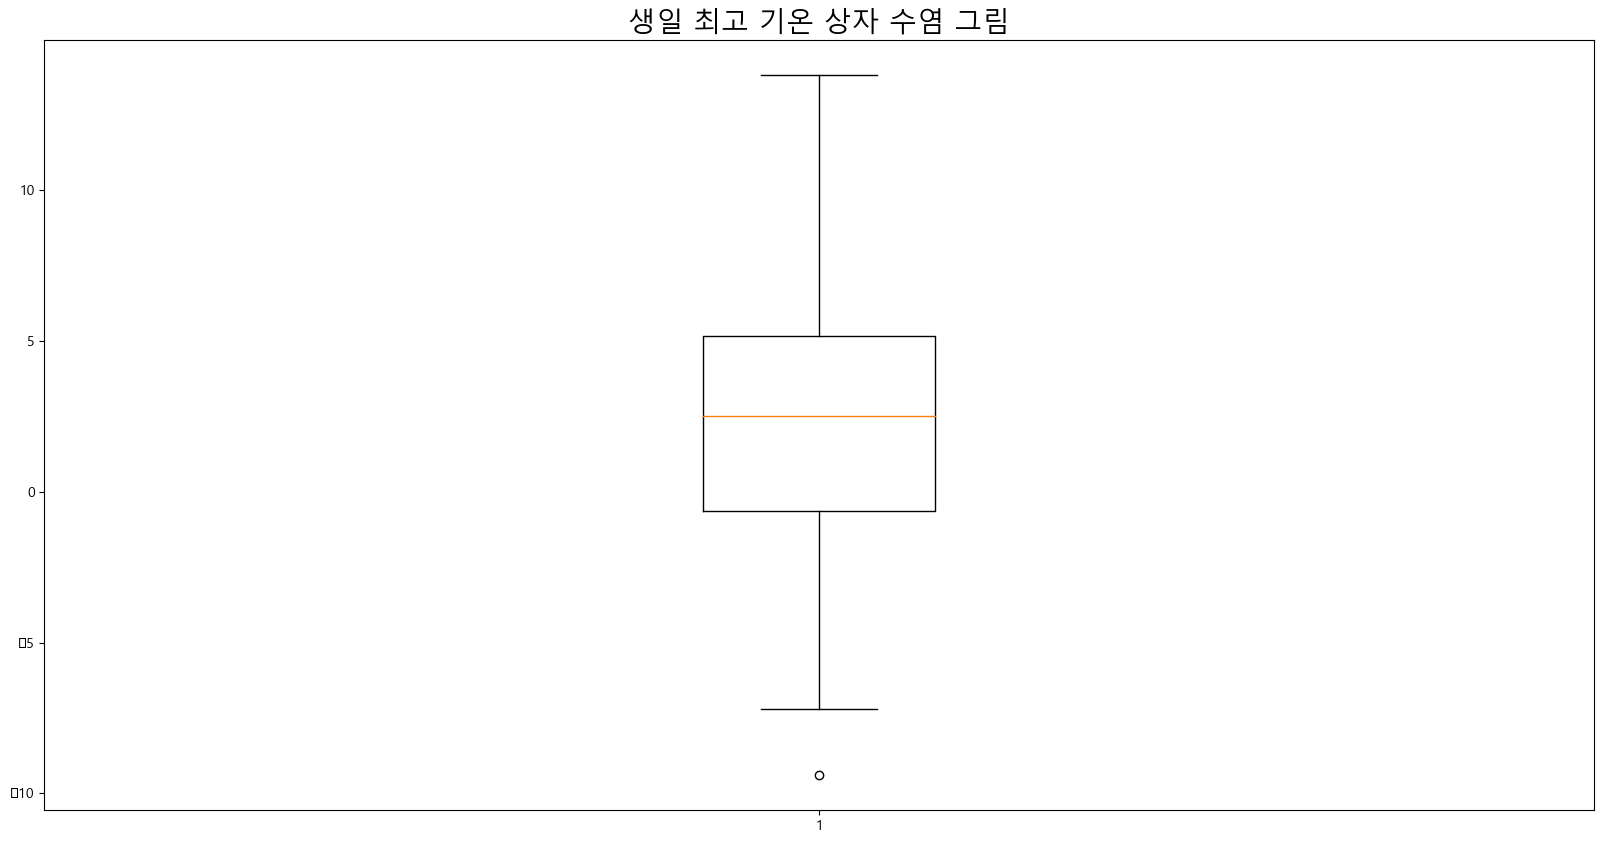

In [40]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1, 1, 1)

ax.boxplot(bd_df["최고기온"].dropna())
ax.set_title("생일 최고 기온 상자 수염 그림", size = 20)
plt.show()

In [41]:
iqr = np.subtract(*np.percentile(bd_df["최고기온"].dropna(), [75, 25]))
iqr

5.775

In [43]:
q3, q1 = np.percentile(bd_df["최고기온"].dropna(), [75, 25])
q3, q1

(5.15, -0.625)

In [44]:
outlier = q1 - (1.5 * iqr)
outlier

-9.287500000000001

In [46]:
bd_df[bd_df["최고기온"] < outlier]

,날짜,지점,평균기온,최저기온,최고기온,date
8530,1931-02-07,108,-12.9,-15.8,-9.4,1931-02-07
